
# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains 14 associated information about over 100k medical appointments in Brazil.

>Data Dictionary
1. atientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or Female.
4. ScheduledDay - Day the patient set up their appointment.
5. AppointmentDay - Day of appointment.
6. Age - How old is the patient.
7. Neighborhood - Location of the hospital.
8. Scholarship - True of False.
9. Hipertension -True or False.
10. Diabetes - True or False.
11. Alcoholism - True or False.
12. Handcap - How many disabled organ?
13. SMS_received - True or False.
14. No-show  - True or False.


### Question(s) for Analysis
>What factors are impact on patient and help us to know will he show up on his appointment or not? 

#### Import my libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Load Data

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

#### View Dataset

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Some Overview Statistics

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Check for Null-values & Datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Check for Duplication

In [6]:
sum(df.duplicated())

0

#### Issues

* Illogical age with negative value.
* Incorrect data types [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, No-show ].
* Somrtimes AppointmentDay is equal or before ScheduledDay.


### Data Cleaning

#### Drop rows with negative age value

In [4]:
df.drop(df.loc[df['Age']==-1].index, inplace=True)

####  Function to correct datatype

In [5]:
def change_type(df, col_name, new_type):
    '''
    Takes 3 inputs and correct the datatype by astype method
    (DataFrame) df - the dataframe you want to apply some changes on it
    (str) col_name - column name you want to convert
    (dtype) new_type - the new data type u want to convert 
    '''
    
    df[col_name] = df[col_name].astype(new_type)

#### Correct data type

In [8]:
change_type(df, 'PatientId', str)
change_type(df, 'AppointmentID', str)
change_type(df, 'Gender', 'category')
change_type(df, 'Neighbourhood', 'category')
change_type(df, 'ScheduledDay', 'datetime64[ns]')
change_type(df, 'AppointmentDay', 'datetime64[ns]')
change_type(df, 'Scholarship', bool)
change_type(df, 'Hipertension', bool)
change_type(df, 'Diabetes', bool)
change_type(df, 'Alcoholism', bool)
change_type(df, 'SMS_received', bool)

#### Replace Yes/No to boolean expression            

In [9]:
df =df.replace({'No-show': {'Yes': True, 'No': False}})

#### Drop rows with llogical ScheduledDay & AppointmentDay variables

In [10]:
df.drop(df[df['ScheduledDay'].dt.date >= df['AppointmentDay'].dt.date].index,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is Age or Handcap a factor help us to know will patient show up or not?)

#### Function plot histogram display relation between show/no some and other column

In [14]:
def plot_h(df, col_name, xlabel, ylabel, title):
    '''
    df - the dataframe you want to plot from
    col_name - the plotted column
    [title, xlabel, ylabel]: plot settings
    
    '''
    plt.figure(figsize = [15, 10])
    showed = df['No-show'] == False
    not_showed = df['No-show'] == True
    try:
        df[col_name][showed].hist(label = 'Showed')
        df[col_name][not_showed].hist(label = 'Not showed')
    except:
        sns.countplot(data = df, x = col_name, hue = 'No-show')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show();

#### Does age affect patient attendance?

###### Plot a histogram to see the distribution of  age for  patients who showed and not.

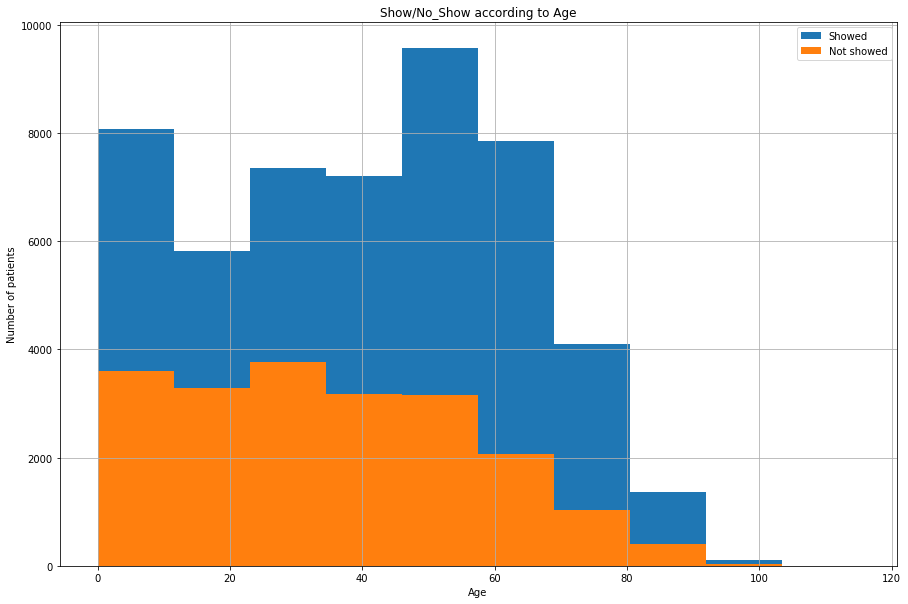

In [15]:
plot_h(df, "Age", "Age", "Number of patients", "Show/No_Show according to Age")

###### From histogram we can see it's a  right-skewed distribution that shows that the patient's age in the period from newborn to seventy is likely to show on appointment.

#### Does handcap affect patient attendance?

###### Plot a histogram to figure out what is the ratio between the number of disability organ and the number of patients who showed and not.

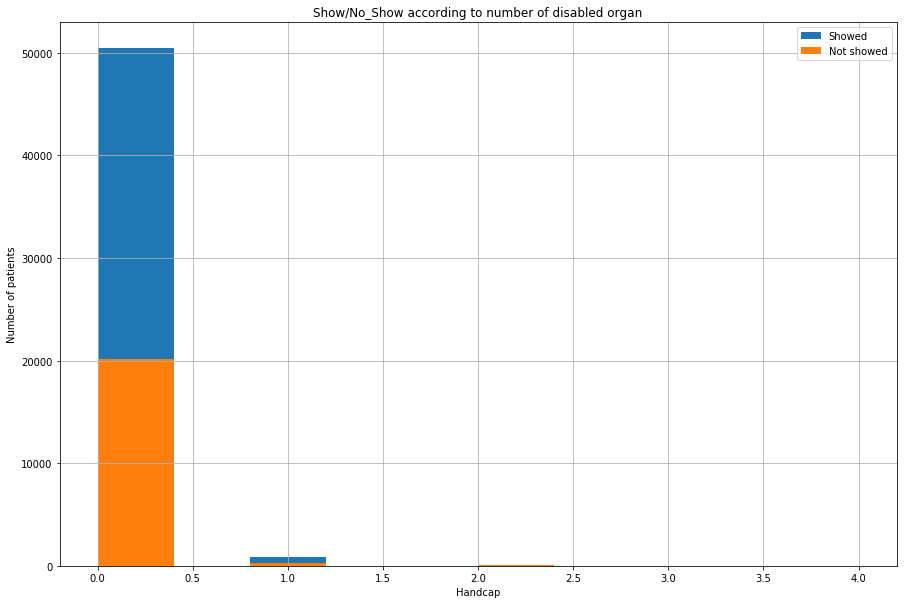

In [16]:
plot_h(df, "Handcap", "Handcap", "Number of patients", "Show/No_Show according to number of disabled organ")

######  From histogram we can see it's a right-skewed distribution that shows patients who don't have any disability are more likely to show than those who have.

### Research Question 2  (How many messages have received? - Which gender goes more to hospital? )

#### How many messages have received?

###### Plot a ratio between numbers of received and not received SMS.

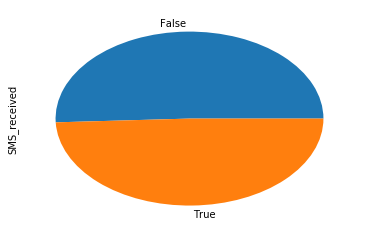

In [54]:
df['SMS_received'].value_counts().plot(kind='pie');

###### From SMS_received pie chart we can see that the percentage of those who did not receive a message is more than those who did.

#### Which gender goes more to hospital?

######  Plot a ratio between numbers of two genders.

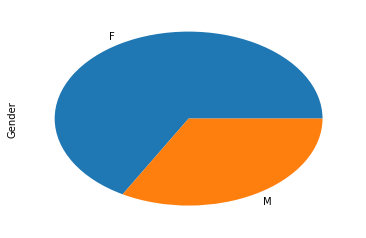

In [47]:
df['Gender'].value_counts().plot(kind='pie');

###### From Gender pie chart we can see that the percentage of females is greater than males.

<a id='conclusions'></a>
## Conclusions

>The visualization showed that we can predict whether a patient will attend or not based on age and disability, the more there is no disability, the more likely the patient will come, and the more the patient is a newborn to the age of 70, the more likely he will come.

>Also, most patients are female which means high health care and most patients did not receive messages.


## limitations 
* Improper data type in columns like Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received and Not-show that consume more memory size it is better to store it in boolean value.
* It's not possible that appointmentDay is before scheduledDay like you can see in example row bellow.
![alt text](attachment:Screenshot%202022-05-18%20034920.png "Logo Title Text 1")
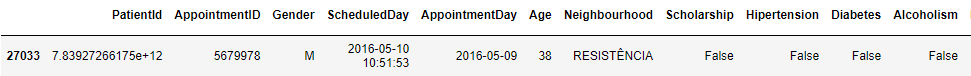

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0